In [1]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.9/819.9 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 8.28.0
    Uninstalling ipython-8.28.0:
      Successfully uninstalled ipython-8.28.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# TF-IDF

## Introduction

To begin, we're going to initialize a pandas DataFrame of Greek tragedy by line.

You might be wondering why we aren't using Pausanias as usual. Tragedy has some nice built-in features that let us get to the heart of some experiments more quickly: rather than having broad geographical labels, each line comes pre-labeled by `dramatist`, `play`, and `speaker`.

From the `speaker` label, we can derive information such as age, gender, social status, etc.

These labels thus provide a lot of categorical data essentially for free, giving us a number of variables with which to experiment.

I've gone ahead and pre-processed the Perseus XML for you, although you should take a look at [`preprocess.py`](./preprocess.py) when you have a chance so that you know what's happening.

Let's load up the dataframe and confirm that things look as expected.

In [2]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

df = pd.read_pickle("./greek-tragedy-by-line.pickle")

df[df['speaker'].str.lower() == 'chorus']

,n,urn,dramatist,title,speaker,text
0,1,urn:cts:greekLit:tlg0085.tlg001.perseus-eng2,Aeschylus,Suppliant Maidens,Chorus,"May Zeus who guards suppliants look graciously upon our company, which boarded a ship and put to sea from the outlets of the fine sand of the"
1,5,urn:cts:greekLit:tlg0085.tlg001.perseus-eng2,Aeschylus,Suppliant Maidens,Chorus,whose pastures border
2,10,urn:cts:greekLit:tlg0085.tlg001.perseus-eng2,Aeschylus,Suppliant Maidens,Chorus,"It was Danaus, our father, adviser and leader, who, considering well our course, decided, as the best of all possible evils, that we flee with all speed over the waves of the sea"
3,15,urn:cts:greekLit:tlg0085.tlg001.perseus-eng2,Aeschylus,Suppliant Maidens,Chorus,and find a haven on
4,20,urn:cts:greekLit:tlg0085.tlg001.perseus-eng2,Aeschylus,Suppliant Maidens,Chorus,"could we come with these wool-wreathed branches in our hands, sole weapons of the suppliant? O realm, O land, and clear water; gods on high and earth-bound powers, grievous in your vengeance,"
...,...,...,...,...,...,...
17900,1306,urn:cts:greekLit:tlg0006.tlg003.perseus-eng2,Euripides,Medea,Chorus,"Unhappy man, thou knowest not the full extent of thy misery, else had thou never said those words."
17902,1309,urn:cts:greekLit:tlg0006.tlg003.perseus-eng2,Euripides,Medea,Chorus,Thy sons are dead; slain by their own mother’s hand.
17904,1311,urn:cts:greekLit:tlg0006.tlg003.perseus-eng2,Euripides,Medea,Chorus,Thy children are no more; be sure of this.
17906,1313,urn:cts:greekLit:tlg0006.tlg003.perseus-eng2,Euripides,Medea,Chorus,Throw wide the doors and see thy children’s murdered corpses.


## TF-IDF

Before we get into the details of TF-IDF --- a somewhat old-school method that still deserves attention --- let's get a feel for what its results look like.

We'll divide the lines by play and collapse all of the rows per play into three very long strings. These strings are the **documents** that make up our **corpus**.

In [3]:
docs = df.groupby(['dramatist', 'title'])['text'].apply(' '.join).reset_index()


Then, we're going to use the `TfidfVectorizer` class from `scikit-learn` to calculate the TF-IDF scores for each term in the corpus, labeled by document.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(docs['text'])

tfidf_df = pd.DataFrame(
    X.toarray(),
    index=docs['title'],
    columns=vectorizer.get_feature_names_out(),
)

tfidf_df

,278,293,aah,aand,abae,abandon,abandoned,abandoning,abase,abased,...,zeal,zealous,zealously,zenith,zephuros,zephyrus,zethus,zeus,zone,οft
title,,,,,,,,,,,,,,,,,,,,,
Agamemnon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.01023,0.000000,0.000000,0.040676,0.000000,0.000000
Eumenides,0.000000,0.000000,0.000000,0.000000,0.000000,0.024368,0.012184,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.042499,0.000000,0.00000,0.000000,0.000000,0.123918,0.000000,0.000000
Libation Bearers,0.000000,0.000000,0.000000,0.000000,0.000000,0.023177,0.011589,0.000000,0.000000,0.000000,...,0.011589,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.080359,0.000000,0.000000
Persians,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012371,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.017324,0.000000,0.000000
Prometheus Bound,0.000000,0.000000,0.053619,0.000000,0.000000,0.010248,0.000000,0.000000,0.000000,0.000000,...,0.020496,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.251094,0.000000,0.000000
Seven Against Thebes,0.000000,0.000000,0.000000,0.000000,0.000000,0.029798,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.101019,0.000000,0.000000
Suppliant Maidens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.269430,0.000000,0.000000
Andromache,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.011509,0.000000,0.000000
Bacchae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006865,0.009065,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.098385,0.000000,0.000000


As you can see, we have only 31 rows but 12,121 columns -- a bit unwieldy. Let's pick a selection of words to examine.

In [6]:
keywords = [
    "apollo",
    "death", 
    "delphi",
    "divinity",
    "gods",
    "humankind",
    "humans",
    "life",
    "men",
    "sanctuary",
    "women",
    "zeus"
]

tfidf_df[keywords]

,apollo,death,delphi,divinity,gods,humankind,humans,life,men,sanctuary,women,zeus
title,,,,,,,,,,,,
Agamemnon,0.000000,0.027118,0.000000,0.000000,0.081353,0.000000,0.000000,0.027118,0.029829,0.000000,0.000000,0.040676
Eumenides,0.048031,0.050694,0.000000,0.000000,0.152081,0.000000,0.000000,0.067591,0.061959,0.048737,0.038309,0.123918
Libation Bearers,0.015228,0.080359,0.000000,0.012784,0.091074,0.000000,0.016497,0.048216,0.042858,0.000000,0.048581,0.080359
Persians,0.000000,0.025986,0.000000,0.010335,0.064965,0.000000,0.000000,0.034648,0.112606,0.000000,0.004909,0.017324
Prometheus Bound,0.000000,0.014213,0.000000,0.011305,0.108965,0.000000,0.000000,0.023688,0.028426,0.000000,0.005370,0.251094
Seven Against Thebes,0.026104,0.087244,0.000000,0.000000,0.224997,0.000000,0.000000,0.018367,0.123978,0.000000,0.026025,0.101019
Suppliant Maidens,0.017019,0.047899,0.000000,0.000000,0.191594,0.000000,0.000000,0.011975,0.107772,0.038854,0.047508,0.269430
Andromache,0.000000,0.042749,0.049623,0.000000,0.008221,0.000000,0.000000,0.036172,0.036172,0.003557,0.014910,0.011509
Bacchae,0.004511,0.022216,0.000000,0.007573,0.079343,0.000000,0.000000,0.031737,0.053953,0.000000,0.093535,0.098385


That's not so bad. But what do these numbers tell us?

> Discuss: How do you interpret the numbers above? What are some of the drawbacks of performing this analysis on translations?

### Term Frequency (TF)

We have already worked with **term frequency** extensively in this course: in its simplest form, it is the raw frequency of a given **term** in the **corpus**.

But we can intuitively see that this simple form will have a bias towards longer documents: the more terms in a document, the more chances there are for any given term to occur.

What is a **term** in this case? It could be a word, a token, a lemma, or n-grams thereof, or it could be a lexico-grammatical or syntactic feature. We use **term** as a flexible catch-all for any countable feature of the corpus.

There are various ways of normalizing TF depending on the needs of our corpus and analysis. A common normalization is simply to convert the raw count for a term into a relative count -- we've done this in nearly every class, taking the absolute frequency of term `t` and dividing it by the total number of terms in a document.

```math
tf(t, d) = \frac{f(t, d)}{\sum_{t' \in d}f(t', d)}
```

Alternatively, we can apply log normalization: 

```math
tf(t, d) = \log(1 + f(t, d))
```

Or we can even normalize according to the most frequently occurring term in the document:

```math
tf(t, d) = 0.5 + 0.5 \cdot \frac{f(t, d)}{max_{\{t' \in d\}}f(t', d)}
```

### (Inverse) Document Frequency (DF)

**Document frequency** is the number of documents containing the term divided by the total number of documents.

**Inverse document frequency**, then, is the inverse of that function:

```math
idf(t, D) = \log{\frac{N}{|{d : d \in D \text{ and } t \in d}|}}
```

Similarly $`tf(t, d)`$, $`idf(t, D)`$ can be weighted in various ways. 

> Discuss: For example, how might we account for a term that isn't in the corpus?

See https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting for notes on Scikit's implementation.

### Putting it all together

TF-IDF, then, is just the product of these two calculations.

```math
tfidf(t, d, D) = tf(t, d) \cdot idf(t, D)
```

### Exercises

1. Write your own TF and IDF functions using techniques we have covered in the course so far.
2. Use the "documents" that we passed to the `TfidfVectorizer` above, calculate your own scores for the English translations of the tragedies.
3. Compare them to the scores from scikit-learn -- what might account for similarities and differences? (You can consult the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

In [7]:
import re

In [41]:
from collections import Counter
import math


In [61]:
test_string = "A A A, B B, C C C, D"
corpus = docs['text']

def tokenize (d:str):
    return re.findall(r"\w+|[^\w\s]",d, re.UNICODE)

def tf (t: str, d: str):
    doc = tokenize(d)
    abs_freq = Counter(doc)[t]
    return (abs_freq + 1) / (len(doc) + 1)

def idf (t:str, D: list[str]):
    return math.log(len(D) + 1) / (len([1 for d in D if t in tokenize(d)]) + 1)

# print (tf("E", df['text'][12] ))

def tfidf(t: str, D: list[str]):
    return [tf(t, d) * idf(t,D) for d in D]

test_corpus = [
    "the fast green cat with the green dog",
    "the slow green turtle",
    "the quick blue rabbit",
]
print (tfidf("Zeus", corpus))


[0.0001397812334758299, 0.0002956322905456092, 0.0001910338387608713, 6.244479183722985e-05, 0.0005851355013481279, 0.0002720320716541775, 0.0006532907632146089, 7.453195489891884e-05, 0.0003002196727996991, 0.00010615461598871987, 5.8839685057492636e-05, 0.00020858492706392397, 0.00019210895224982833, 0.00025365908551203045, 0.00014155241011473474, 0.0001287158749163281, 8.80164542563929e-05, 0.00010354959473746294, 0.00011241544020424675, 9.728342470645967e-05, 6.336669739394917e-05, 9.183714112010885e-05, 0.00011409181350195422, 0.00012574022480165415, 8.376198527648219e-05, 0.00011793260149917402, 7.112800807519141e-05, 7.744063420354953e-05, 0.00016333511335357945, 0.00011987188374376475, 0.00023772987936047091]


## Using TF-IDF for document clustering

So what can we use TF-IDF for? In addition to highlighting important terms for a given document, it can also be used for clustering documents and analyzing their overlap.

We're going to follow [this tutorial](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-pyy) for clustering with "sparse features," with modifications for our own (much smaller) dataset.

"Sparse features" refers to our use of TF-IDF for labeling words in this case -- rather than a dense representation of words in the vocabulary of the corpus (e.g., word embeddings), we're clustering via the sparse feature of a TF-IDF score.

In [62]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

data_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=(),
)


In [67]:
from time import time
from sklearn.model_selection import train_test_split


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False):
    data_train, data_test = train_test_split(docs, test_size=0.4)

    target_names = data_train.dramatist.unique()

    # split target in a training set and a test set
    y_train, y_test = data_train.dramatist, data_test.dramatist

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(stop_words="english")
    X_train = vectorizer.fit_transform(data_train['text'])
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test['text'])
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train['text'])
        data_test_size_mb = size_mb(data_test['text'])

        print(
            f"{len(data_train['text'])} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test['text'])} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [71]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

18 documents - 0.99MB (training set)
13 documents - 0.71MB (test set)
3 categories
vectorize training done in 0.098s at 10.103MB/s
n_samples: 18, n_features: 9777
vectorize testing done in 0.054s at 13.070MB/s
n_samples: 13, n_features: 9777


In [72]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

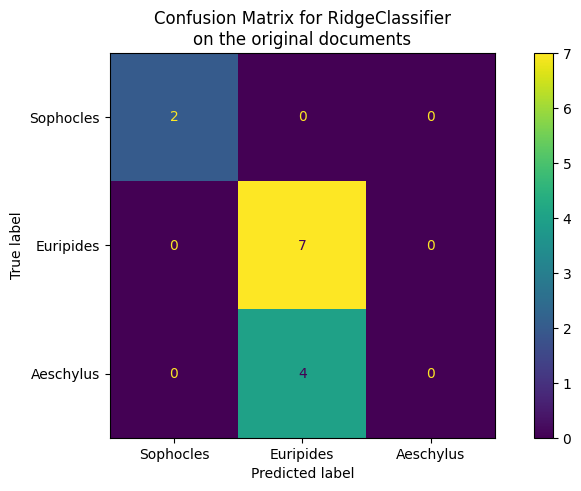

In [73]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

Try re-running the above analyses a few times. What do you notice? What does this mean about our data?

### Exercises

1. Rewrite the `load_data` function to train on play titles rather than dramatists. (Hint: You will need to rerun the `.groupby` operation above so that `title` is the left-most column in the DataFrame.)
2. Rerun and analyze the results.

# Bibliography

Reades, Jonathan, and Jennie Williams. 2023. “Clustering and Visualising Documents Using Word Embeddings.” Programming Historian, August. https://programminghistorian.org/en/lessons/clustering-visualizing-word-embeddings.

https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-pyy

https://developers.google.com/machine-learning/crash-course/linear-regression

https://developers.google.com/machine-learning/crash-course/logistic-regression
